In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv('c172_file_1.csv')

In [4]:
data.head(10)

,AltAGL,AltB,AltGPS,AltMSL,BaroA,E1_CHT1,E1_CHT2,E1_CHT3,E1_CHT4,E1_EGT1,...,LatAc,NormAc,OAT,Pitch,Roll,TAS,VSpd,VSpdG,WndDr,WndSpd
0,0.0,855.8,745.7,833.6,30.05,231.88,224.27,243.57,245.74,1047.12,...,0.01,0.01,27.2,1.25,-0.21,0.0,-14.35,-3.9,0.0,0.0
1,0.0,856.8,746.2,834.0,30.05,232.23,224.58,243.87,246.04,1046.06,...,0.01,-0.00,27.2,1.23,-0.15,0.0,0.74,-3.9,0.0,0.0
2,0.0,855.8,746.4,834.2,30.05,232.59,224.84,244.12,246.34,1046.17,...,0.00,-0.01,27.2,1.21,-0.14,0.0,5.96,-3.9,0.0,0.0
3,0.0,856.8,745.2,833.1,30.05,232.96,225.10,244.46,246.59,1046.32,...,-0.00,-0.01,27.2,1.22,-0.14,0.0,9.95,-3.9,0.0,0.0
4,0.0,856.8,745.2,833.0,30.05,233.30,225.36,244.75,246.86,1043.91,...,0.01,-0.01,27.2,1.22,-0.10,0.0,13.36,-3.9,0.0,0.0
5,0.0,855.8,745.1,832.9,30.05,233.64,225.61,245.01,247.17,1037.83,...,-0.00,0.01,27.2,1.23,-0.15,0.0,-7.16,-3.9,0.0,0.0
6,0.0,854.8,745.0,832.8,30.05,233.18,225.11,244.54,246.64,1035.39,...,0.01,-0.01,27.2,1.21,-0.12,0.0,-18.10,-3.9,0.0,0.0
7,0.0,854.8,745.2,833.0,30.05,233.43,225.29,244.68,246.84,1037.75,...,0.00,0.00,27.2,1.21,-0.11,0.0,-30.21,-3.9,0.0,0.0
8,0.0,853.8,745.6,833.4,30.05,233.77,225.56,244.99,247.10,1040.44,...,0.00,0.01,27.2,1.24,-0.11,0.0,-31.94,0.0,0.0,0.0
9,0.0,853.8,746.0,833.8,30.05,234.11,225.81,245.25,247.38,1041.33,...,0.01,0.02,27.2,1.24,-0.11,0.0,-32.00,3.9,0.0,0.0


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoder (SimpleRNN)          (None, 10, 64)            6144      
_________________________________________________________________
Decoder (SimpleRNN)          (None, 10, 64)            8256      
_________________________________________________________________
time_distributed (TimeDistri (None, 10, 31)            2015      
Total params: 16,415
Trainable params: 16,415
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
38/38 [==============================] - 0s 12ms/step - loss: 0.1524 - accuracy: 0.0781 - val_loss: 0.0413 - val_accuracy: 0.0656
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.1527 - val_loss: 0.0200 - val_accuracy: 0.1922
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.

Epoch 53/100
38/38 [==============================] - 0s 4ms/step - loss: 7.5562e-04 - accuracy: 0.6856 - val_loss: 7.8015e-04 - val_accuracy: 0.6530
Epoch 54/100
38/38 [==============================] - 0s 4ms/step - loss: 7.1812e-04 - accuracy: 0.6890 - val_loss: 7.3617e-04 - val_accuracy: 0.6764
Epoch 55/100
38/38 [==============================] - 0s 4ms/step - loss: 6.8846e-04 - accuracy: 0.6928 - val_loss: 7.2285e-04 - val_accuracy: 0.6869
Epoch 56/100
38/38 [==============================] - 0s 4ms/step - loss: 6.7768e-04 - accuracy: 0.6945 - val_loss: 7.2530e-04 - val_accuracy: 0.6921
Epoch 57/100
38/38 [==============================] - 0s 4ms/step - loss: 6.5348e-04 - accuracy: 0.6986 - val_loss: 6.6786e-04 - val_accuracy: 0.7000
Epoch 58/100
38/38 [==============================] - 0s 4ms/step - loss: 6.2968e-04 - accuracy: 0.6979 - val_loss: 6.7052e-04 - val_accuracy: 0.7002
Epoch 59/100
38/38 [==============================] - 0s 4ms/step - loss: 6.2443e-04 - accuracy: 0.7

38/38 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.1871 - val_loss: 0.0246 - val_accuracy: 0.2583
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0184 - accuracy: 0.2952 - val_loss: 0.0148 - val_accuracy: 0.3630
Epoch 4/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0118 - accuracy: 0.3485 - val_loss: 0.0105 - val_accuracy: 0.3855
Epoch 5/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0088 - accuracy: 0.3910 - val_loss: 0.0083 - val_accuracy: 0.3969
Epoch 6/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0072 - accuracy: 0.4070 - val_loss: 0.0069 - val_accuracy: 0.4406
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0061 - accuracy: 0.4465 - val_loss: 0.0059 - val_accuracy: 0.4471
Epoch 8/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0053 - accuracy: 0.4659 - val_loss: 0.0052 - val_accuracy: 0.4842
Epoch 9/100
38/38 

Epoch 58/100
38/38 [==============================] - 0s 11ms/step - loss: 2.9603e-04 - accuracy: 0.7565 - val_loss: 3.0952e-04 - val_accuracy: 0.7691
Epoch 59/100
38/38 [==============================] - 0s 11ms/step - loss: 2.8928e-04 - accuracy: 0.7611 - val_loss: 2.8948e-04 - val_accuracy: 0.7673
Epoch 60/100
38/38 [==============================] - 0s 11ms/step - loss: 2.7586e-04 - accuracy: 0.7601 - val_loss: 2.8689e-04 - val_accuracy: 0.7685
Epoch 61/100
38/38 [==============================] - 0s 11ms/step - loss: 2.7347e-04 - accuracy: 0.7642 - val_loss: 2.8414e-04 - val_accuracy: 0.7697
Epoch 62/100
38/38 [==============================] - 0s 11ms/step - loss: 2.6288e-04 - accuracy: 0.7639 - val_loss: 2.7843e-04 - val_accuracy: 0.7780
Epoch 63/100
38/38 [==============================] - 0s 11ms/step - loss: 2.5621e-04 - accuracy: 0.7671 - val_loss: 2.6606e-04 - val_accuracy: 0.7648
Epoch 64/100
38/38 [==============================] - 0s 11ms/step - loss: 2.4797e-04 - accura

38/38 [==============================] - 0s 11ms/step - loss: 0.0038 - accuracy: 0.4895 - val_loss: 0.0036 - val_accuracy: 0.4903
Epoch 8/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0031 - accuracy: 0.5060 - val_loss: 0.0029 - val_accuracy: 0.5059
Epoch 9/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0026 - accuracy: 0.5211 - val_loss: 0.0024 - val_accuracy: 0.5440
Epoch 10/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 0.5517 - val_loss: 0.0021 - val_accuracy: 0.5373
Epoch 11/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0018 - accuracy: 0.5806 - val_loss: 0.0018 - val_accuracy: 0.6024
Epoch 12/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 0.5991 - val_loss: 0.0016 - val_accuracy: 0.6054
Epoch 13/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 0.6178 - val_loss: 0.0014 - val_accuracy: 0.6325
Epoch 14/100
3

Epoch 62/100
38/38 [==============================] - 0s 11ms/step - loss: 1.0814e-04 - accuracy: 0.8147 - val_loss: 1.1108e-04 - val_accuracy: 0.8006
Epoch 63/100
38/38 [==============================] - 0s 11ms/step - loss: 1.0538e-04 - accuracy: 0.8138 - val_loss: 1.0961e-04 - val_accuracy: 0.8304
Epoch 64/100
38/38 [==============================] - 0s 11ms/step - loss: 1.0258e-04 - accuracy: 0.8157 - val_loss: 1.0837e-04 - val_accuracy: 0.7983
Epoch 65/100
38/38 [==============================] - 0s 11ms/step - loss: 9.9968e-05 - accuracy: 0.8181 - val_loss: 1.0637e-04 - val_accuracy: 0.8181
Epoch 66/100
38/38 [==============================] - 0s 11ms/step - loss: 9.8151e-05 - accuracy: 0.8139 - val_loss: 1.0209e-04 - val_accuracy: 0.8024
Epoch 67/100
38/38 [==============================] - 0s 11ms/step - loss: 9.4907e-05 - accuracy: 0.8220 - val_loss: 9.9907e-05 - val_accuracy: 0.8117
Epoch 68/100
38/38 [==============================] - 0s 11ms/step - loss: 9.3280e-05 - accura

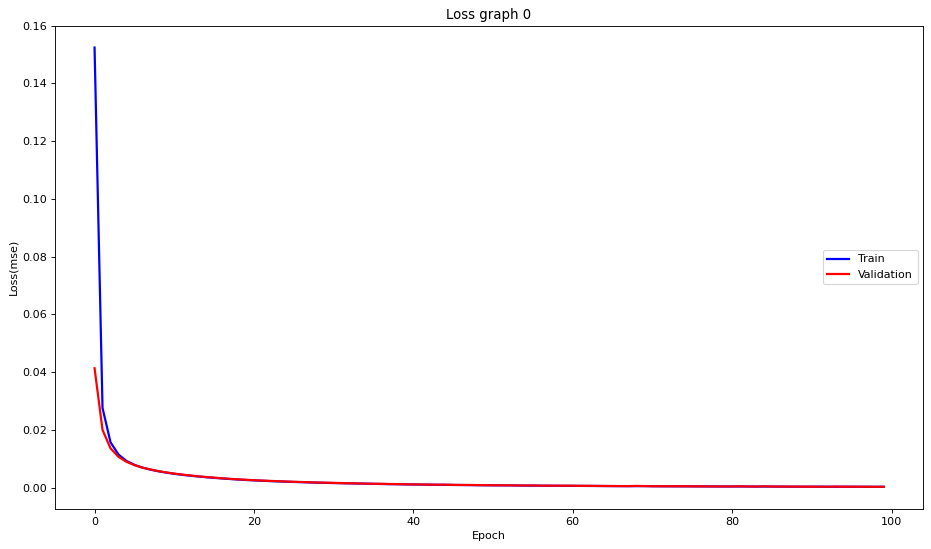

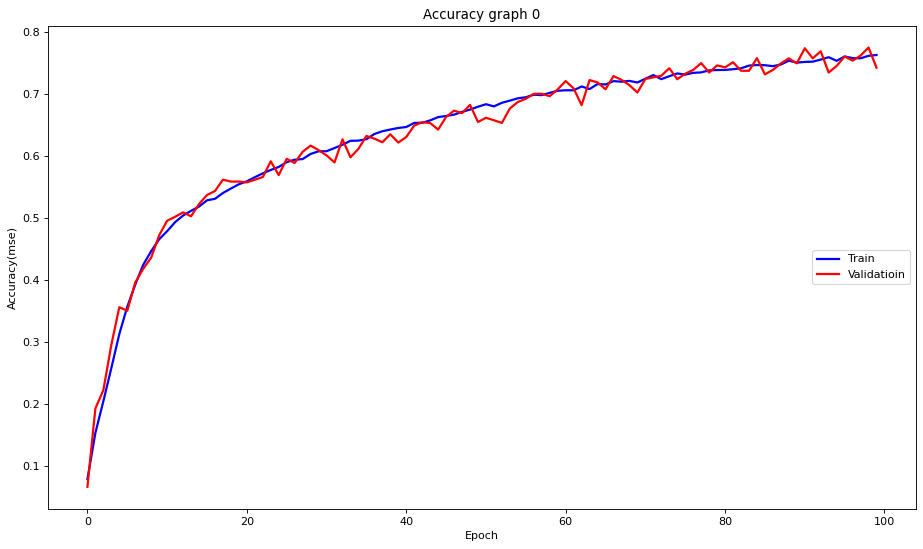

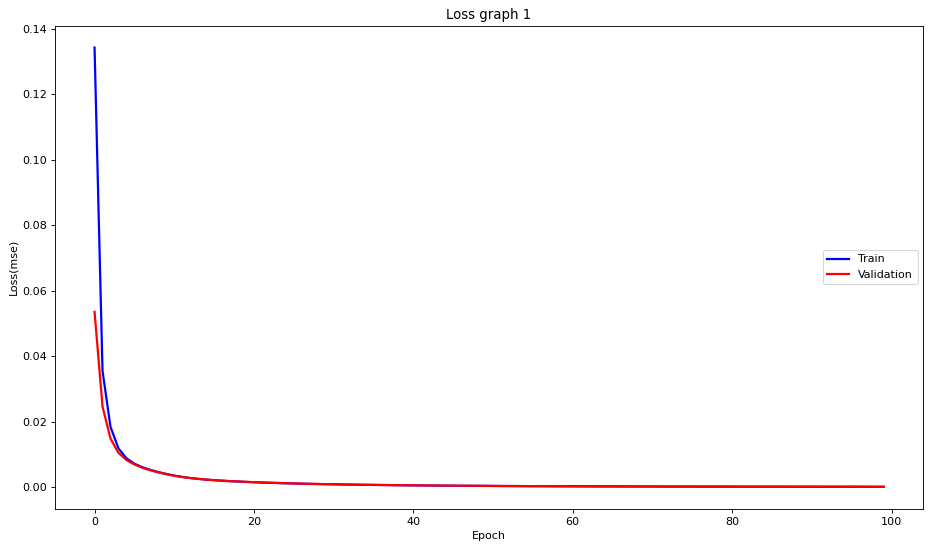

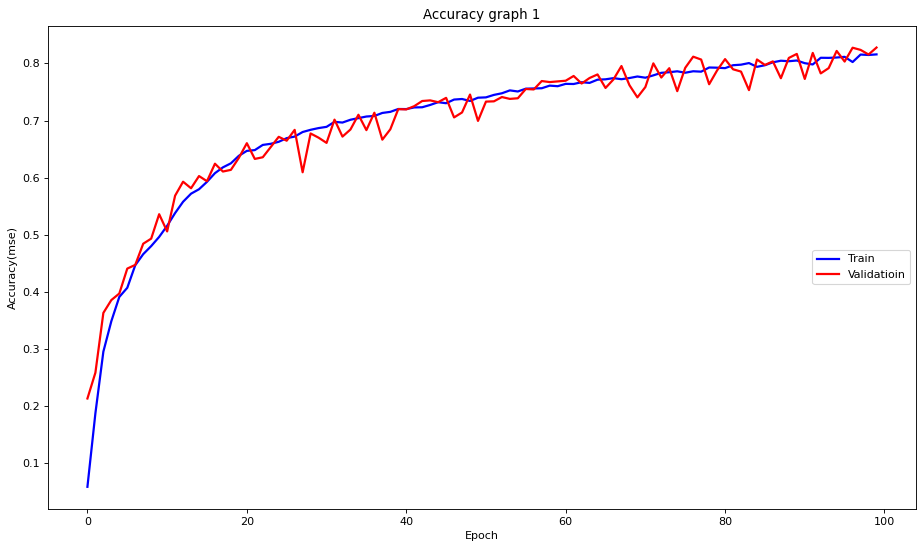

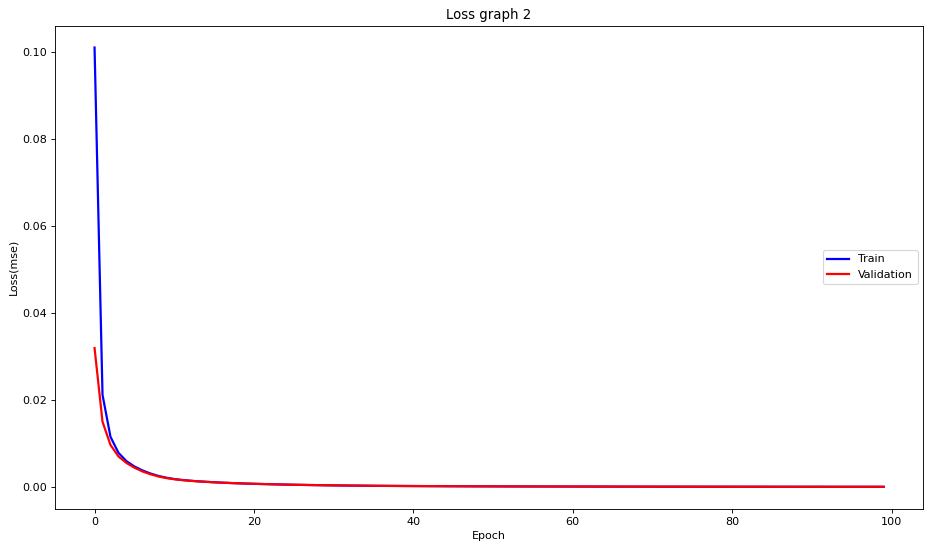

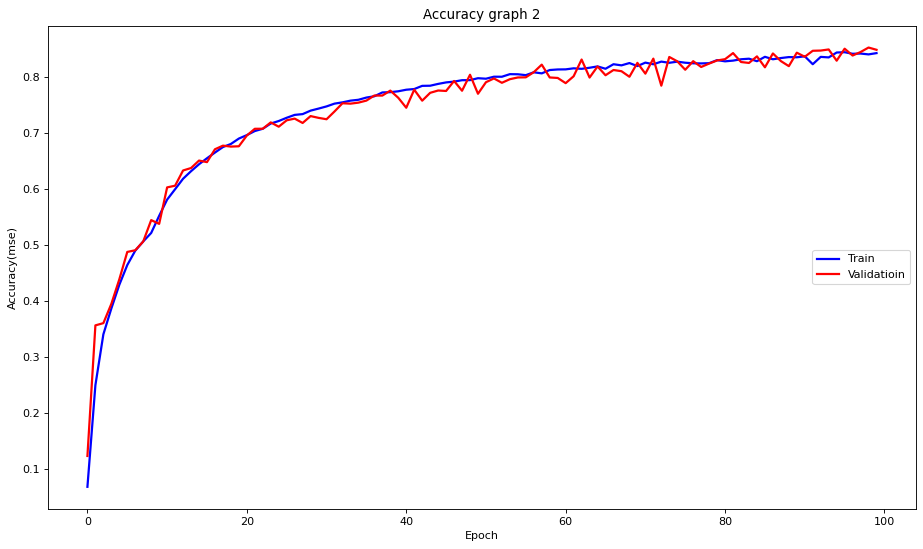

In [5]:
%run demo-model.py